In [1]:
# !wget https://cs.stanford.edu/group/mlgroup/MURA-v1.1.zip

In [1]:
!pip install --upgrade pip # 新版本安装速度更快
!pip install -U --ignore-installed wrapt enum34 simplejson netaddr imageio setuptools #正确安装tf需要
##!pip install tensorflow-gpu==2.0.0b1 # 但是服务器好像只认这个版本的tf🌚
#!pip install tensorflow-gpu==2.3.0 #-i https://pypi.tuna.tsinghua.edu.cn/simple #把华为源换掉虽然有点慢但是新版本没有保存模型的bug

#!pip install tensorflow-transform

!pip install tensorflow-gpu==2.3.0
!pip install matplotlib==2.2.3
!pip install pyyaml h5py
##!pip install gast==0.2.2
##!pip install numpy==1.15.1
##!pip install pillow==5.2.0 #CAM要用


!pip install --upgrade scikit-image
!pip install --upgrade keras==2.3.1
#!pip install numpy==1.19.0
!pip uninstall numpy --yes
!pip uninstall numpy --yes
!pip uninstall numpy --yes
!pip install numpy==1.18.4

!pip install pyarrow==0.16.0
!pip install protobuf==3.12.0

#!pip install tensorflow-gpu==2.3.0
#!pip install tensorflow_graphics==1.0.0

    100% |████████████████████████████████| 1.5MB 88.7MB/s ta 0:00:01��█████████████████████████████ | 1.5MB 88.4MB/s eta 0:00:01
  Found existing installation: pip 9.0.1
    Uninstalling pip-9.0.1:
      Successfully uninstalled pip-9.0.1
Looking in indexes: http://repo.myhuaweicloud.com/repository/pypi/simple
     |████████████████████████████████| 127 kB 21.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 22.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 22.6 MB/s eta 0:00:01
     |████████████████████████████████| 783 kB 67.9 MB/s eta 0:00:01
     |████████████████████████████████| 14.5 MB 27.4 MB/s eta 0:00:01███████▋                   | 5.7 MB 27.4 MB/s eta 0:00:01��██████████▎       | 11.0 MB 27.4 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 22.7 MB/s eta 0:00:01
  Created wheel for wrapt: filename=wrapt-1.12.1-cp36-cp36m-linux_x86_64.whl size=68065 sha256=00117eb8c60fd36eec2013583b48fc7e5e63a37093e84d335cd90ca9fb239620
  St

In [1]:
##装完直接restart不load，这样可以不报错

import  tensorflow as tf
from    tensorflow import keras
from    tensorflow.keras import layers, models, Sequential, datasets, regularizers
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten,Reshape, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D, GRU, Bidirectional

#from keras import layers, models, Sequential, datasets
#from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten,Reshape, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D, GRU, Bidirectional
import matplotlib.pyplot as plt
import os
import h5py

import pathlib
#from class_activation_map import CAMsLogger
#from utils_mini import *
#from utils import *
from utils_augment_mini import *

#import tensorflow_transform as tft
#import tensorflow_graphics as tfg

print(keras.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2.4.0
Num GPUs Available:  1


In [2]:
#LOAD_TRUNCATED_IMAGES = True
import random
train_csv = 'MURA-v1.1/train_labeled_studies.csv'
#val_csv = 'MURA-v1.1/valid_labeled_studies.csv'
train_data = load_data(train_csv)
#val_data = load_data(val_csv)

shoulder MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/*.png


/home/ma-user/work/edge_function.py:51: RuntimeWarning: overflow encountered in exp
  out3[i,j]=1./(1+np.exp(-(sum3-0.5)*100))


shoulder MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/*.png
shoulder MURA-v1.1/train/XR_SHOULDER/patient00003/study1_positive/*.png
shoulder MURA-v1.1/train/XR_SHOULDER/patient00004/study1_positive/*.png
shoulder MURA-v1.1/train/XR_SHOULDER/patient00005/study1_positive/*.png
shoulder MURA-v1.1/train/XR_SHOULDER/patient00006/study1_positive/*.png
shoulder MURA-v1.1/train/XR_SHOULDER/patient00007/study1_positive/*.png
shoulder MURA-v1.1/train/XR_SHOULDER/patient00007/study2_negative/*.png
shoulder MURA-v1.1/train/XR_SHOULDER/patient00008/study1_positive/*.png
shoulder MURA-v1.1/train/XR_SHOULDER/patient00009/study1_positive/*.png
shoulder MURA-v1.1/train/XR_SHOULDER/patient00010/study1_positive/*.png
shoulder MURA-v1.1/train/XR_SHOULDER/patient00011/study1_positive/*.png
shoulder MURA-v1.1/train/XR_SHOULDER/patient00012/study1_positive/*.png
shoulder MURA-v1.1/train/XR_SHOULDER/patient00013/study1_positive/*.png
shoulder MURA-v1.1/train/XR_SHOULDER/patient00014/study1_positiv

In [3]:
# model = keras.applications.EfficientNetB4(include_top=True, pooling='avg',input_shape=(224, 224, 3), weights=None, classes=1)
# model.summary()

In [5]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
model.load_weights(latest)

In [6]:
model.save_weights('./checkpoints/my_checkpoint')

In [8]:
model.load_weights('./checkpoints/my_checkpoint')

In [7]:
base_model = keras.applications.EfficientNetB4(include_top=False, pooling='avg',input_shape=(224, 224, 3), weights='./efficientnetb4_notop.h5', classes=1)
#base_model.trainable = False

for layer in base_model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False

base_model_out = base_model.get_layer('top_conv').output
base_model_out = BatchNormalization(name='top_bn')(base_model_out)
base_model_out = tf.keras.layers.GlobalAveragePooling2D()(base_model_out)

base_model_out = tf.keras.layers.Dense(1024, name='Base_Dense1', activation='sigmoid', kernel_regularizer=regularizers.l2(0.001))(base_model_out)#, kernel_regularizer=regularizers.l2(0.005)
base_model_out = Dropout(0.2)(base_model_out)
#base_model_out = BatchNormalization()(base_model_out)

base_model_out = tf.keras.layers.Dense(512, name='Base_Dense2', activation='sigmoid', kernel_regularizer=regularizers.l2(0.001))(base_model_out)#, kernel_regularizer=regularizers.l2(0.005)
base_model_out = Dropout(0.2)(base_model_out)
#base_model_out = BatchNormalization()(base_model_out)

base_model_out = tf.keras.layers.Dense(256, name='Base_Dense3', activation='sigmoid', kernel_regularizer=regularizers.l2(0.001))(base_model_out)#, kernel_regularizer=regularizers.l2(0.005)
base_model_out = Dropout(0.2)(base_model_out)
#base_model_out = BatchNormalization()(base_model_out)

base_model_out = tf.keras.layers.Dense(120, name='Base_Dense4', activation='sigmoid', kernel_regularizer=regularizers.l2(0.001))(base_model_out)#, kernel_regularizer=regularizers.l2(0.005)
base_model_out = Dropout(0.2)(base_model_out)
#base_model_out = BatchNormalization()(base_model_out)


base_model_out = tf.keras.layers.Dense(1)(base_model_out)
y_pred = Activation('sigmoid',name='top_activation')(base_model_out) 

model = tf.keras.Model(inputs=base_model.input, outputs=y_pred)

In [26]:
fc1.get_config()

{'activation': 'linear',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'dtype': 'float32',
 'filters': 1792,
 'groups': 1,
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'distribution': 'truncated_normal',
   'mode': 'fan_out',
   'scale': 2.0,
   'seed': None}},
 'kernel_regularizer': None,
 'kernel_size': (1, 1),
 'name': 'top_conv',
 'padding': 'same',
 'strides': (1, 1),
 'trainable': True,
 'use_bias': False}

In [15]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
_______________________________________________________________________________________

In [ ]:
from tensorflow.keras.layers import LeakyReLU,TimeDistributed

base_model = keras.applications.EfficientNetB0(include_top=False, pooling=None,input_shape=(224, 224, 3), weights=None, classes=1) #, weights='./efficientnetb0_notop.h5'
#base_model = keras.applications.EfficientNetB0(include_top=False, weights='./efficientnetb4_notop.h5',input_shape=(224, 224, 3), pooling='avg', classes=1)
#正式可以用B7 权重在线下不来（网址Google系）
#base_model.trainable = False
#base_model_out = base_model(inputs)

# o = base_model.get_layer('top_conv').output
# base_cov = tf.keras.Model(inputs=base_model.input, outputs=o)
# base_model_out = base_cov.output

base_model_out = base_model.get_layer('top_conv').output

base_model_out = TimeDistributed()(base_model_out)

base_model_out = TimeDistributed(GlobalAveragePooling2D())(base_model_out)

base_model_out = TimeDistributed(base_model_out)
# base_model_out = BatchNormalization(name='top_bn')(base_model_out)

#base_model_out = Activation('sigmoid',name='top_activation')(base_model_out) 


# base_model_out = tf.keras.layers.Dense(1024, name='Base_Dense1', activation='sigmoid', kernel_initializer='normal')(base_model_out)#, kernel_regularizer=regularizers.l2(0.001)
# base_model_out = BatchNormalization()(base_model_out)

# base_model_out = tf.keras.layers.Dense(1024, name='Base_Dense2', activation='sigmoid', kernel_initializer='normal')(base_model_out)#, kernel_regularizer=regularizers.l2(0.005)
# base_model_out = BatchNormalization()(base_model_out)
# #base_model_out = tf.keras.layers.Dropout(0.2)(base_model_out)

# # base_model_out = tf.keras.layers.Dense(512, name='Base_Dense3', activation='sigmoid', kernel_initializer='normal')(base_model_out)#, kernel_regularizer=regularizers.l2(0.005)
# # base_model_out = BatchNormalization()(base_model_out)
# #base_model_out = tf.keras.layers.Dropout(0.2)(base_model_out)

# GRU_input = tf.keras.layers.Dense(256, name='Base_Dense4', kernel_initializer='normal')(base_model_out)#, kernel_regularizer=regularizers.l2(0.005)
# #GRU_input = tf.keras.layers.Dropout(0.2)(base_model_out)
# #GRU_input = BatchNormalization()(base_model_out)


# base_model_out = tf.keras.layers.Dense(512, name='Base_Dense3', activation='tanh')(base_model_out)#, kernel_regularizer=regularizers.l2(0.005)
# base_model_out = BatchNormalization()(base_model_out)
# #base_model_out = LeakyReLU(alpha=0.1)(base_model_out)
# # base_model_out = tf.keras.layers.Dropout(0.2)(base_model_out)

#CNN_out = tf.keras.layers.Dense(1, activation='tanh')(base_model_out)#, activation='sigmoid'
#CNN_out = LeakyReLU(alpha=0.1)(CNN_out)

#GRU_imput = tf.keras.layers.Dense(120, kernel_regularizer=regularizers.l2(0.006), name='GRU_imput')(base_model_out)
#GRU_imput = tf.keras.layers.Dense(120,activation='sigmoid', name='GRU_imput')(base_model_out)
#GRU_imput = BatchNormalization()(GRU_imput)
#GRU_imput = LeakyReLU(alpha=0.1)(GRU_imput)
#GRU_imput = tf.keras.layers.Dropout(0.3)(GRU_imput)
#model_CNN = tf.keras.Model(inputs=base_model.input, outputs=[GRU_imput, CNN_out])

In [4]:
 #,input_shape=(None,1280)

#forward_layer = GRU(256, dropout=0.5, kernel_regularizer=regularizers.l2(0.006), return_sequences=True)
forward_layer1 = GRU(512, dropout=0.2)
forward_layer2 = GRU(256, return_sequences=True)
forward_layer3 = GRU(256, return_sequences=True)

#backward_layer = GRU(256, dropout=0.3, kernel_regularizer=regularizers.l2(0.001),return_sequences=True)

# GRU_input = Permute((2,1,3),name='permute')(GRU_input)
# GRU_input = TimeDistributed(Flatten(),name='timedistrib')(GRU_input)

GRU_input = tf.keras.layers.Reshape((-1,1), name='reshape_GRU')(GRU_input)

x = forward_layer1(GRU_input)
# x = forward_layer2(x)
# x = forward_layer3(x)

# x = Bidirectional(forward_layer1, merge_mode='ave', name='GRU_L1')(GRU_input) #, input_shape=(1,120)
# x = Bidirectional(forward_layer2, merge_mode='ave', name='GRU_L2')(x)
# x = Bidirectional(forward_layer3, merge_mode='ave', name='GRU_L3')(x)

x = tf.keras.layers.Flatten()(x)

# x = tf.squeeze(x,axis=1)

x = tf.keras.layers.Dense(256, name='cls_Dense1', activation='sigmoid', kernel_initializer='normal')(x)#, kernel_regularizer=regularizers.l2(0.005)
#x = tf.keras.layers.Dropout(0.2)(x)
x = BatchNormalization()(x)

#, activation='sigmoid'
# x = tf.keras.layers.Dense(256, name='cls_Dense2', kernel_initializer='normal')(x)#, kernel_regularizer=regularizers.l2(0.005)
# x = BatchNormalization()(x)

# #concat = tf.keras.layers.concatenate([CNN_out, x], axis=1)

y_pred = tf.keras.layers.Dense(1, activation='sigmoid',name='class_final')(x)

#y_pred = tf.keras.layers.Dropout(0)(y_pred)

#y_pred = y_pred + 1e-8

model = tf.keras.Model(inputs=base_model.input, outputs=y_pred)

In [8]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
_______________________________________________________________________________________

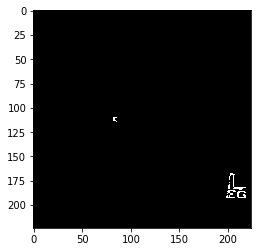

In [16]:
%matplotlib inline
plt.imshow(np.array(val_data[0][7][:,:,1],dtype='float32'),cmap='gray')
plt.show()
#np.average(val_data[0][2])

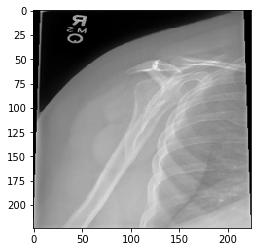

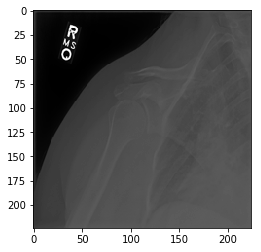

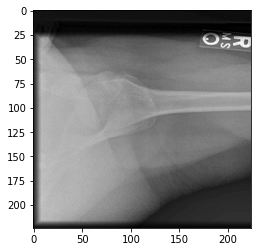

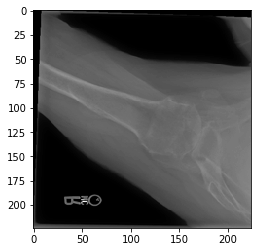

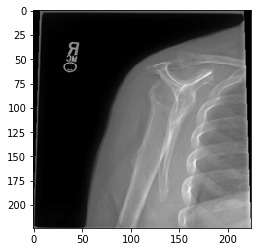

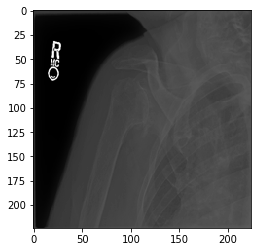

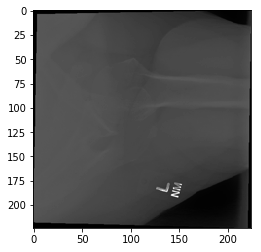

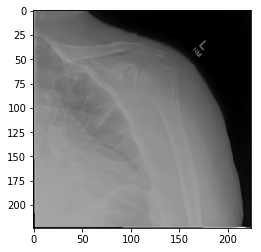

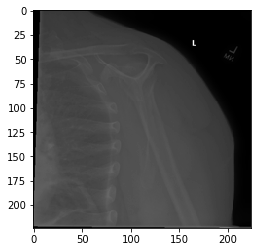

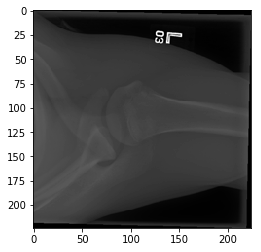

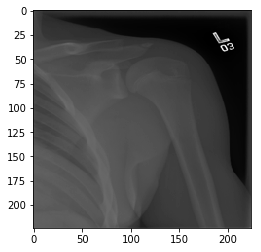

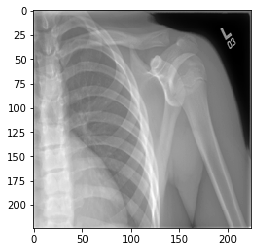

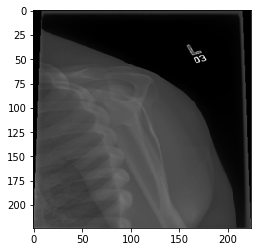

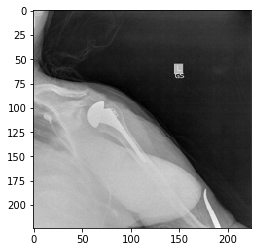

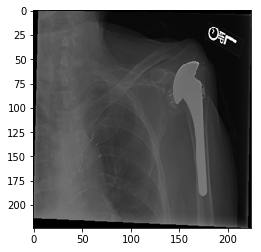

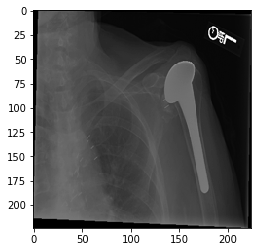

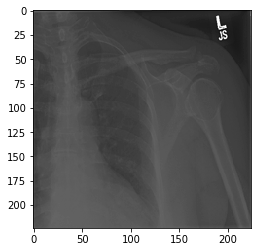

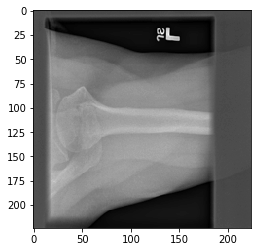

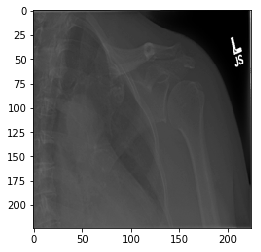

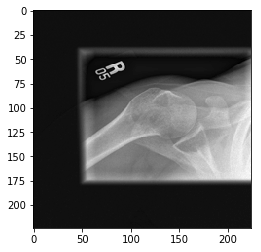

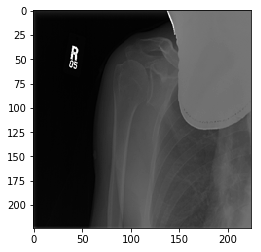

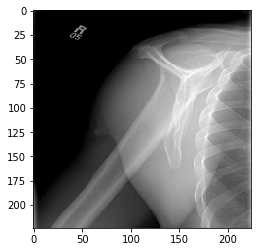

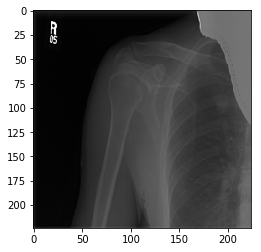

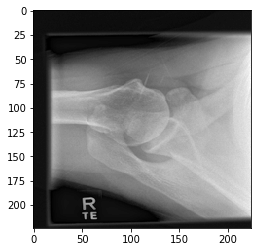

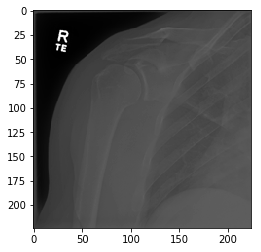

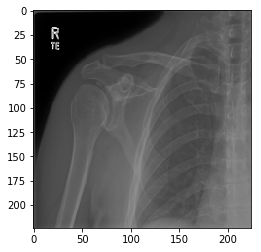

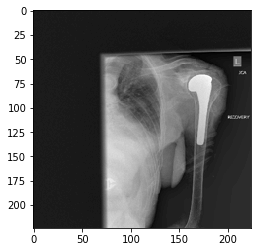

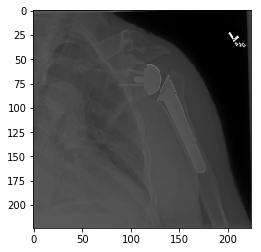

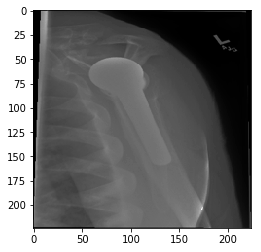

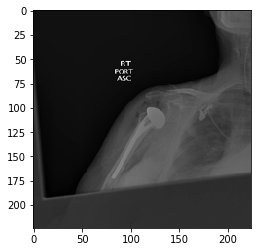

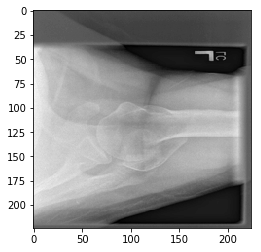

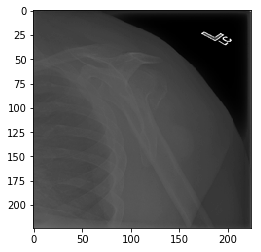

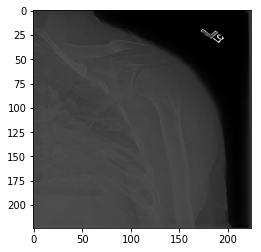

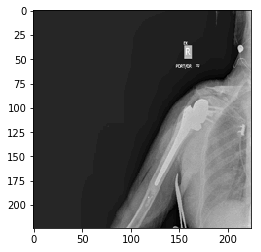

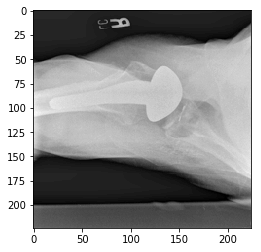

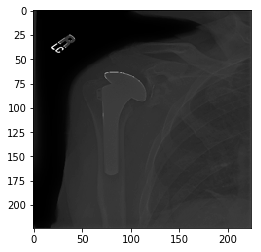

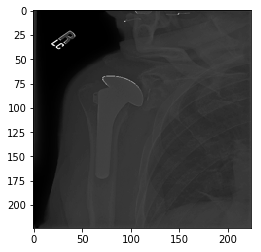

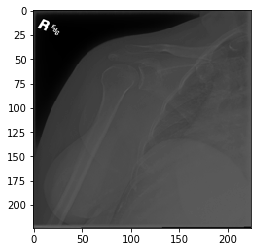

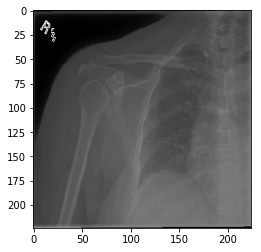

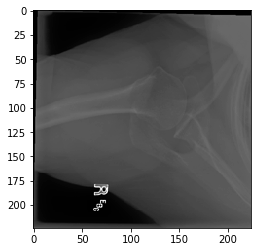

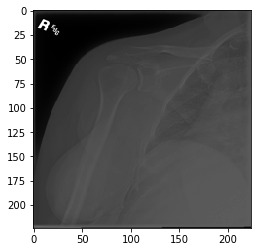

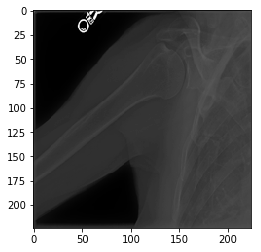

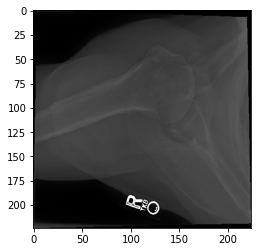

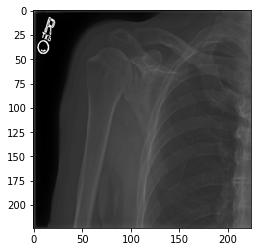

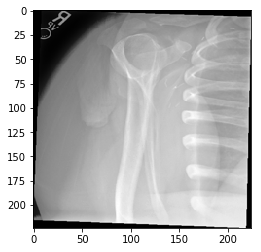

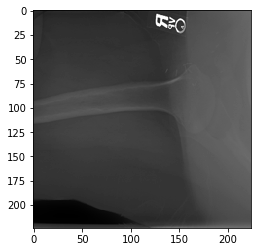

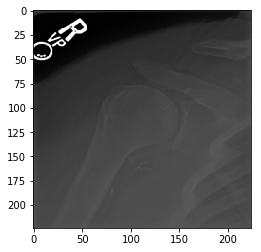

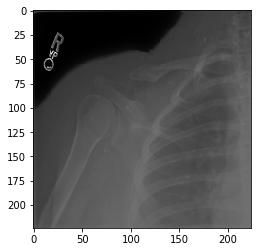

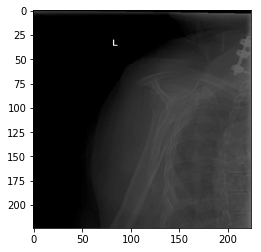

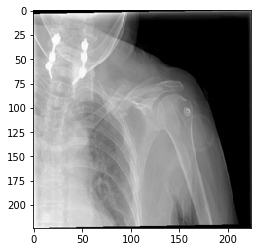

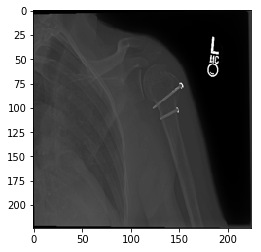

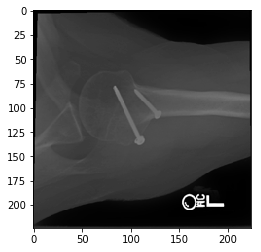

In [7]:
for i in range(len(train_data[:])):
    
    plt.ion()
    #plt.figure(img)
    plt.imshow(np.array(train_data[i][:,:,0],dtype='float32'),cmap='gray')
    plt.pause(1)
    plt.close()
    i=i+1

In [6]:
i=0

In [7]:
# import time
# from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, ReduceLROnPlateau
# checkpoint_path = "training_1/cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# cp_callback = [ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, verbose=1), 
#                                                 #,monitor='val_acc', save_best_only=True, mode='max'
#                                                  #save_freq=50000, # zyc：每50000个step保存一次权重
#                                                  #)
#                CSVLogger("model_history_log_{}.csv".format(int(time.time())), append=True),
#                TensorBoard(log_dir="./logs_{}".format(int(time.time()))),
#               ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, verbose=0, mode='auto', epsilon=0.0001, cooldown=0, min_lr=0)]
#                 #keras.callbacks.LearningRateScheduler(lr_decayed_fn), 


In [4]:
from time import strftime, gmtime
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, ReduceLROnPlateau
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = [ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, verbose=1, monitor='val_accuracy', save_best_only=True, mode='max'),
               #keras.callbacks.LearningRateScheduler(lr_decayed_fn), 
               CSVLogger("./csv/model_history_log_{}.csv".format(strftime("%Y_%b_%d, %H+8:%M:%S", gmtime())), append=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=0, mode='auto', epsilon=0.0001, cooldown=0, min_lr=0)]
                #tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)


In [5]:
initial_learning_rate = 0.001
#initial_learning_rate = 0.00001
#initial_learning_rate = 0.000001

# #优化器
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.02, rho=0.9, momentum=0.9, epsilon=1e-07, centered=False)
opt = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
# from tensorflow.keras.optimizers import SGD
# opt = SGD(lr=0.01)
# model.compile(optimizer=opt,loss="categorical_crossentropy", metrics=['accuracy'])

In [11]:
# from tensorflow.keras.optimizers import SGD
# opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True,clipvalue=0.5)
# #opt = SGD(lr=0.0005, decay=1e-6, momentum=0.9, nesterov=True)
# ls = tf.keras.losses.BinaryCrossentropy(label_smoothing=0.001)

# model.compile(optimizer=opt,loss="categorical_crossentropy", metrics=['accuracy'])

In [6]:
history = model.fit(train_data[0][:], train_data[1][:], batch_size=32, epochs=20,
                    validation_data=(val_data[0][:], val_data[1][:]), callbacks=[cp_callback])
# zyc：下面报错不要怕 是中途手动终止都会这样，可以运行的

Epoch 1/20
21/21 [==============================] - ETA: 0s - loss: 3.8918 - accuracy: 0.6000
Epoch 00001: val_accuracy improved from -inf to 0.52690, saving model to training_1/cp.ckpt
21/21 [==============================] - 12s 577ms/step - loss: 3.8918 - accuracy: 0.6000 - val_loss: 2.4057 - val_accuracy: 0.5269
Epoch 2/20
21/21 [==============================] - ETA: 0s - loss: 1.7755 - accuracy: 0.6366
Epoch 00002: val_accuracy did not improve from 0.52690
21/21 [==============================] - 7s 353ms/step - loss: 1.7755 - accuracy: 0.6366 - val_loss: 1.4469 - val_accuracy: 0.5269
Epoch 3/20
21/21 [==============================] - ETA: 0s - loss: 1.1782 - accuracy: 0.6061
Epoch 00003: val_accuracy did not improve from 0.52690
21/21 [==============================] - 7s 352ms/step - loss: 1.1782 - accuracy: 0.6061 - val_loss: 1.1694 - val_accuracy: 0.5269
Epoch 4/20
21/21 [==============================] - ETA: 0s - loss: 1.0070 - accuracy: 0.6122
Epoch 00004: val_accuracy di

In [8]:
base_model.trainable = True

set_trainable = False
for layer in base_model.layers:
    if layer.name == 'block7b_se_excite':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
#似乎batch size改成16，学习率0.00001比较好 15个epoch之后会过拟合 dropout0.2采用后可以以这个参数跑30个epoch而不过拟合(之后效果就不提升了)，也许不需要跑太多次因为还需要放开卷积

#dropout0.2开局是5个epoch比较好

#dropout0.3开局5个ep比较好

In [7]:
base_model.trainable = True

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    samplewise_std_normalization=True,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True)

datagen.fit(train_data[0][:])

/home/ma-user/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [10]:
history = model.fit(datagen.flow(train_data[0][:], train_data[1][:], batch_size=16), epochs=30,
                    validation_data=(val_data[0][:], val_data[1][:]), callbacks=[cp_callback])

#initial_epoch=30

Epoch 1/30
41/41 [==============================] - ETA: 0s - loss: 0.9284 - accuracy: 0.5975
Epoch 00001: val_loss did not improve from 0.93577
41/41 [==============================] - 11s 277ms/step - loss: 0.9284 - accuracy: 0.5975 - val_loss: 1.0569 - val_accuracy: 0.5102
Epoch 2/30
41/41 [==============================] - ETA: 0s - loss: 0.8930 - accuracy: 0.6252
Epoch 00002: val_loss did not improve from 0.93577
41/41 [==============================] - 8s 195ms/step - loss: 0.8930 - accuracy: 0.6252 - val_loss: 1.0511 - val_accuracy: 0.5102
Epoch 3/30
41/41 [==============================] - ETA: 0s - loss: 0.9047 - accuracy: 0.6175
Epoch 00003: val_loss did not improve from 0.93577
41/41 [==============================] - 8s 195ms/step - loss: 0.9047 - accuracy: 0.6175 - val_loss: 1.0414 - val_accuracy: 0.5102
Epoch 4/30
41/41 [==============================] - ETA: 0s - loss: 0.8850 - accuracy: 0.6237
Epoch 00004: val_loss did not improve from 0.93577
41/41 [===================

KeyboardInterrupt: 

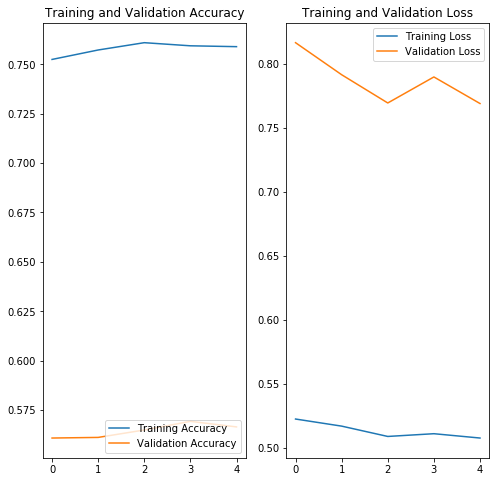

In [15]:
# zyc：完整跑完fit里设定的那几个epochs之后history才能调用 中途退出的情况调用不了（也画不了图）

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5) # 不同epoch数要改

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Unfreeze the base model
base_model.trainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are take into account
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train end-to-end. Be careful to stop before you overfit!
history = model.fit(train_data[0][:], train_data[1][:], epochs=20, 
                    validation_data=(val_data[0][:], val_data[1][:]), batch_size=32, callbacks=[cp_callback])

In [11]:
#import time
#model.save('densenet_cams{}.h5'.format(time.time()))

model.save('my_model_e3_dropped_65v.h5') # 需要HDF5的包

#应该是有一些用法在2.0版本保存权重时会出bug #更新：已解决

In [9]:
model = tf.keras.models.load_model('my_model_e3_dropped_65v.h5') # don't compile if you want to continue

In [11]:
# zyc：从之前的最新的checkpoint加载权重继续训练 第一次fit不用运行

latest = tf.train.latest_checkpoint(checkpoint_dir)
model.load_weights(latest)


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x7f63d02536a0> and <tensorflow.python.keras.layers.core.Dropout object at 0x7f63d020c5c0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x7f63d021c978> and <tensorflow.python.keras.layers.core.Dropout object at 0x7f63d021c860>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.wrappers.Bidirectional object at 0x7f6428c9b1d0> and <tensorflow.python.keras.layers.core.Reshape object at 0x7f6428c9b0b8>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.wrappers.Bidirectional object at 0x7f60f85f0710> and <tensorflow.python.keras.layers.wrappers.Bidirectional object at 0x7f6428c9b1d0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.wrappers.Bidirectional object at 0x7f60f84d5f28> and <tensor

ValueError: Shapes (256,) and (120,) are incompatible

In [12]:
results = model.evaluate(val_data[0][:], val_data[1][:], batch_size=32)
print("test loss, test acc:", results)

21/21 [==============================] - 2s 86ms/step - loss: 1.0952 - accuracy: 0.6282
test loss, test acc: [1.0951604843139648, 0.6282246112823486]


In [7]:
PP = 0
NN = 0
NP = 0
PN = 0

#val_npa = np.array(val_data[1][:])

predic = model.predict(val_data[0][:])
predic = predic.squeeze()


for i in range(len(val_data[1][:])):
    if int(val_data[1][i])==1 and predic[i]>=0.5:
        PP = PP + 1 # True Positive
    elif int(val_data[1][i])==0 and predic[i]<0.5:
        NN = NN + 1 #TN True Negative
    elif int(val_data[1][i])==0 and predic[i]>=0.5:
        NP = NP + 1
    elif int(val_data[1][i])==1 and predic[i]<0.5:
        PN = PN + 1
    else:
        print('Error:', val_npa[i],'--',predic[i])

P_0 = (PP+NN)/(PP+NN+PN+NP)
P_yes = (PP+PN)/(PP+NN+PN+NP)*(PP+NP)/(PP+NN+PN+NP)
P_no = (NP+NN)/(PP+NN+PN+NP)*(PN+NN)/(PP+NN+PN+NP)
P_e = P_yes + P_no

kappa = (P_0-P_e)/(1-P_e)

print(kappa)

In [3]:
train_data = np.load('d_0_20.npy')

In [4]:
train_data.shape

(52, 224, 224, 3)